# Object Recognition from  CIFAR 10 images
<center><img src="https://github.com/ArijitChakrabarti/Cifar-10-Deep-Learning-FoundationKeras-Tuner-Arijit/blob/main/CIFAR-10-intro.jpg?raw=true" /></center>

<h2><center>'One picture is worth a thousand words'</center></h2>
<div style="text-align: center"> -Albert Einstein</div><br>

***

Images somehow just always make sense - as accurately captured by Albert Einstein.  From my initiation into regimented learning of data science I have worked multiple times on the MNIST dataset.  For this project I wanted to take up something a bit more challenging and also build onto the overall knowledge base of image classification.  Further, I wanted to automate the process of identifying the hyper parameters that would build accuracy for an image classification model.
<br><br>
Armed with these simple points I wanted to find a data-base, which would a step up over  MNIST dataset in terms of difficulty - maybe allowing me to work with color - but not so demanding that I lose focus on the learning outcome of this project.
<br><br>
After searching high and low I found the CIFAR 10 data-set.  It was beautifully arranged set of .png files, and also existed as a dataset in Keras. However, I wanted to start working directly from the pictures itself (converting the image to an array) and not use the existing data-set.  I was also secure in the knowledge that since the dataset also existed in array form I could always cross-check my data and compare it against the data-set to check for possible errors.  My project contains many such checks to ensure that the data was properly convered to the array.
*** 
<br><br>
Hence the project itself can actually be summarized in the following manner:
<br><br>
- Downloaded the CIFAR - 10 .png images from Kaggle
<br><br>
- Converted the images to an array
<br><br>
- Processed the array to make it usable
<br><br>
- Built multiple models on the data with a close check on accuracy
<br>
    - A simple Artificial Neural Network model
<br>
    - A CNN model - built from secondary sources
<br>
    - Using Keras Tuner to enhance the accuracy on the models leveraging
        | Hyperband serach | Random search | Bayesian Optimization | 
<br><br>
- Comparision of the outcomes of the different models 

## Table of Contents

1. [Importing the necessary libraries and data](#section1)<br>
2. [Creating the CIFAR-10 Dataset from Images](#section2)<br>
  - 2.1 [Pickling the Image Data](#section201)<br>
  - 2.2 [Un-Pickling data for restarts](#section202)<br>
3. [Preprocessing the Image Data](#section3)<br>
  - 3.1 [Working with Train / Test Labels](#section301)<br>
  - 3.2 [Flatenning and Normalizing the data](#section302)<br>
  - 3.3 [Preparing separate set for CNN](#section303)<br>
4. [Checking Accuracy of Train Data](#section4)<br>
5. [Model Building](#section5)<br>
  - 5.1 [Simple ANN](#section501)<br>
  - 5.2 [Using CNN](#section502)<br>
6. [Hyper Parameter Tuning using Keras-Tuner](#section6)<br>
  - 6.1 [HyperBand](#section601)<br>
  - 6.2 [RandomSearch](#section602)<br>
  - 6.3 [Bayesian Optimisation](#section603)<br>
7. [In-Conclusion & Next Steps](#section7)<br>
  - 7.1 [Analysis of Accuracies of various models](#section701)<br>
  - 7.2 [Visualising Predictions on test-set](#section702)<br>
  - 7.3 [Concluding points and way forward](#section703)<br>

<a id=section1></a>
## 1. Importing the necessary libraries and data

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import random
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import array_to_img  #has to be separated from above line for some reason...?
from keras.utils import np_utils # for to_categorical,
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner import HyperModel
from kerastuner.tuners import Hyperband, RandomSearch, BayesianOptimization

#from tensorflow.keras.layers import (Conv2D, Dense, Dropout, Flatten, MaxPooling2D)

import pickle

# as the Kaggle dataset does not contain proper implementation for the test data set
# using test data from the Keras Datasets i.e. x_test and y_test
from tensorflow.python.keras.datasets import cifar10
(X_train,y_train),(x_test,y_test) = cifar10.load_data()
print(x_test.shape)
print(y_test.shape)

#download the CIFAR-10 dataset from here 
#https://www.kaggle.com/c/cifar-10

(10000, 32, 32, 3)
(10000, 1)


<a id=section2></a>
## 1. Creating the CIFAR-10 Dataset from Images

In [3]:
#create the dataset for analysis

directory = os.getcwd()
print(directory)
train_folder = directory + '\\train'
test_folder = directory + '\\test'
os.chdir(train_folder)
print(os.getcwd())
filenames=[str(i)+'.png' for i in range(1,50001)]
x_train = np.array([np.array(img_to_array(load_img(fname))) for fname in filenames])
os.chdir(test_folder)
print(os.getcwd())
filenames=[str(i)+'.png' for i in range(1,300001)]
x_test = np.array([np.array(img_to_array(load_img(fname))) for fname in filenames])
print(x_train.shape)
print(x_test.shape)
os.chdir(directory)  #returning back to the main directory
print(os.getcwd())
print('Back to Main directory')

C:\Users\ariji\Documents\Python\INSAID Data Science\Artificial Intelligence\Deep Learning Foundation\Project\Deep Learning Foundation Projects\CIFAR-10
C:\Users\ariji\Documents\Python\INSAID Data Science\Artificial Intelligence\Deep Learning Foundation\Project\Deep Learning Foundation Projects\CIFAR-10\train
C:\Users\ariji\Documents\Python\INSAID Data Science\Artificial Intelligence\Deep Learning Foundation\Project\Deep Learning Foundation Projects\CIFAR-10\test
(50000, 32, 32, 3)
(300000, 32, 32, 3)
C:\Users\ariji\Documents\Python\INSAID Data Science\Artificial Intelligence\Deep Learning Foundation\Project\Deep Learning Foundation Projects\CIFAR-10
Back to Main directory


<a id=section201></a>
### 2.1 Pickling the image data

In [4]:
# now pickling the data created - hence this code does not need to be run always

with open('train.txt', 'wb') as fh:
   pickle.dump(x_train, fh)
print('Train Pickled')
with open('test.txt', 'wb') as fh:
    pickle.dump(x_test, fh)
print('Test Pickled')

Train Pickled
Test Pickled


<a id=section202></a>
### 2.2 Un-Pickling data for restarts

In [2]:
# when starting with the pickled data
# no need to start creating the dataset from scratch

unpickle_train = open('train.txt', 'rb')
x_train = pickle.load(unpickle_train)
print('train data unpickled')
print(x_train.shape)

train data unpickled
(50000, 32, 32, 3)


<a id=section3></a>
## 3. Processing the image Data

<a id=section301></a>
### 3.1 Working with the train / test labels

In [3]:
#loading the labels

# for the y_test set
y_train = pd.read_csv('trainlabels.csv')
y_train = y_train.label
print(y_train.shape)

train_labels, test_labels = pd.get_dummies(y_train) , np_utils.to_categorical(y_test)
print('Post processing train_labels have a shape of {} , test_labels have a shape {}'.format(train_labels.shape, test_labels.shape))
classes = list(train_labels)
print('The 10 categories for classification are:{}' .format(classes))

(50000,)
Post processing train_labels have a shape of (50000, 10) , test_labels have a shape (10000, 10)
The 10 categories for classification are:['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


<a id=section302></a>
### 3.2 Flattening and Normalizing the data

In [4]:
#getting the data ready for deep learning flattening and normalising

x_train2, x_test2 = x_train.reshape(-1, 32*32*3), x_test.reshape(-1,32*32*3)
x_train_norm, x_test_norm = x_train2.astype('float32') /255 , x_test2.astype('float32') /255
print(x_train_norm.shape)
print(x_test_norm.shape)

(50000, 3072)
(10000, 3072)


<a id=section303></a>
### 3.3 Preparing separate set for CNN

In [5]:
# getting data ready for CNN
print(x_train.shape, x_test.shape)

#normalizing images by 255

x_train_cnn, x_test_cnn = x_train/255, x_test/255

(50000, 32, 32, 3) (10000, 32, 32, 3)


<a id=section4></a>
### 4. Checking the accuracy of train data

In [6]:
# for prediction using the classes
nums = [0,1,2,3,4,5,6,7,8,9]
p = dict(zip(nums, classes))
p

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

From row -> 15780
ship


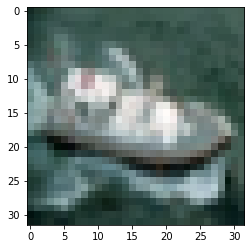

In [8]:
# randomly checking the train data

i=random.randint(0,50000)
print('From row ->', i)
img_frm_data = array_to_img(x_train[i])
print(y_train[i])
plt.imshow(img_frm_data)

<a id=section5></a>
## 5. Model Building

<a id=section501></a>
### 5.1 Simple ANN

In [5]:
# implementing a simple neural network

model = Sequential()
model.add(layers.Dense(10000, input_shape = (32*32*3,), activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

model_history = model.fit(x_train_norm, train_labels, epochs = 200, validation_data = (x_test_norm,test_labels), batch_size = 512, verbose = 2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10000)             30730000  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                100010    
Total params: 30,830,010
Trainable params: 30,830,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
98/98 - 2s - loss: 4.8886 - accuracy: 0.2361 - val_loss: 1.8937 - val_accuracy: 0.3222
Epoch 2/200
98/98 - 1s - loss: 1.8092 - accuracy: 0.3626 - val_loss: 1.7536 - val_accuracy: 0.3712
Epoch 3/200
98/98 - 1s - loss: 1.7050 - accuracy: 0.3961 - val_loss: 1.6597 - val_accuracy: 0.4095
Epoch 4/200
98/98 - 1s - loss: 1.6392 - accuracy: 0.4207 - val_loss: 1.6214 - val_accuracy: 0.4293
Epoch 5/200
98/98 - 1s - loss: 1.6005 - accuracy: 0.4355 - val_loss: 1.5924 - val_accuracy: 0.4354
Epoch 6/200

Epoch 77/200
98/98 - 1s - loss: 0.8330 - accuracy: 0.7107 - val_loss: 1.5557 - val_accuracy: 0.5052
Epoch 78/200
98/98 - 1s - loss: 0.8257 - accuracy: 0.7128 - val_loss: 1.5030 - val_accuracy: 0.5269
Epoch 79/200
98/98 - 1s - loss: 0.8240 - accuracy: 0.7146 - val_loss: 1.5217 - val_accuracy: 0.5175
Epoch 80/200
98/98 - 1s - loss: 0.8079 - accuracy: 0.7203 - val_loss: 1.5575 - val_accuracy: 0.5146
Epoch 81/200
98/98 - 1s - loss: 0.8101 - accuracy: 0.7189 - val_loss: 1.5663 - val_accuracy: 0.5115
Epoch 82/200
98/98 - 1s - loss: 0.8010 - accuracy: 0.7237 - val_loss: 1.5583 - val_accuracy: 0.5148
Epoch 83/200
98/98 - 1s - loss: 0.7994 - accuracy: 0.7241 - val_loss: 1.5472 - val_accuracy: 0.5214
Epoch 84/200
98/98 - 1s - loss: 0.7967 - accuracy: 0.7218 - val_loss: 1.5728 - val_accuracy: 0.5104
Epoch 85/200
98/98 - 1s - loss: 0.7799 - accuracy: 0.7289 - val_loss: 1.5616 - val_accuracy: 0.5227
Epoch 86/200
98/98 - 1s - loss: 0.7749 - accuracy: 0.7322 - val_loss: 1.5644 - val_accuracy: 0.5163


Epoch 159/200
98/98 - 1s - loss: 0.4402 - accuracy: 0.8527 - val_loss: 2.2105 - val_accuracy: 0.5047
Epoch 160/200
98/98 - 1s - loss: 0.4547 - accuracy: 0.8448 - val_loss: 2.1761 - val_accuracy: 0.5070
Epoch 161/200
98/98 - 1s - loss: 0.4522 - accuracy: 0.8456 - val_loss: 2.1796 - val_accuracy: 0.5065
Epoch 162/200
98/98 - 1s - loss: 0.4379 - accuracy: 0.8519 - val_loss: 2.2057 - val_accuracy: 0.5058
Epoch 163/200
98/98 - 1s - loss: 0.4269 - accuracy: 0.8575 - val_loss: 2.1911 - val_accuracy: 0.5079
Epoch 164/200
98/98 - 1s - loss: 0.4355 - accuracy: 0.8511 - val_loss: 2.1916 - val_accuracy: 0.5066
Epoch 165/200
98/98 - 1s - loss: 0.4430 - accuracy: 0.8481 - val_loss: 2.2373 - val_accuracy: 0.5036
Epoch 166/200
98/98 - 1s - loss: 0.4117 - accuracy: 0.8619 - val_loss: 2.2402 - val_accuracy: 0.5062
Epoch 167/200
98/98 - 1s - loss: 0.4272 - accuracy: 0.8558 - val_loss: 2.2278 - val_accuracy: 0.5053
Epoch 168/200
98/98 - 1s - loss: 0.4146 - accuracy: 0.8616 - val_loss: 2.2578 - val_accurac

In [6]:
# building the plotter for model loss and accuracy calculations

def plot_model(model_history):
    losses = pd.DataFrame(model_history.history)
    losses[['loss','val_loss']].plot()
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    
    losses[['accuracy','val_accuracy']].plot()
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

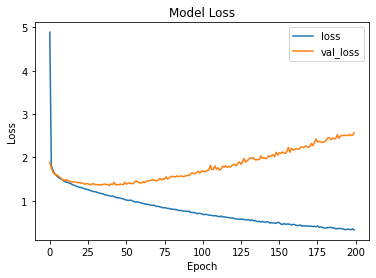

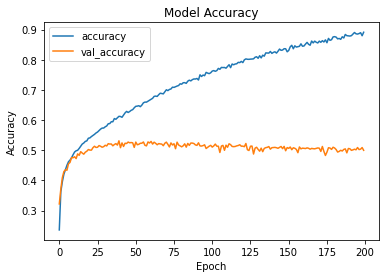

In [7]:
plot_model(model_history)

Observations:
- Overall validation accuracy is stuck at around 50% (which is as good as a random model)
- Also it is clear that addtional epochs are not helping to improve learning - infact validation accuracy is marginally reducing
- It is clear that post the 50th epoch the model is picking up noise as we see training accuracy increasing by not on the test set
- Model optimization can include early stopping to prevent wastage of computing power.

<a id=section502></a>
### 5.2 Using CNN

In [11]:
# however on secondary research it has been seen that Convolutional Neural networks improve on both accuracy and loss
# building model with convolutional neural network

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32,32,3), activation = 'relu',))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(layers.Conv2D(filters = 32, kernel_size = (4,4), activation = 'relu',))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer=  'adam', loss ='categorical_crossentropy', metrics = ['accuracy'])

model.summary()

es = EarlyStopping(monitor = 'val_loss', patience = 50)

model_history = model.fit(x_train_cnn, train_labels, epochs = 200, validation_data = (x_test_cnn, test_labels), callbacks = [es])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               102528    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

Epoch 44/200
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4990 - accuracy: 0.8311 - val_loss: 1.1216 - val_accuracy: 0.6836
Epoch 45/200
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4869 - accuracy: 0.8354 - val_loss: 1.1580 - val_accuracy: 0.6848
Epoch 46/200
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4829 - accuracy: 0.8369 - val_loss: 1.1338 - val_accuracy: 0.6885
Epoch 47/200
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4808 - accuracy: 0.8387 - val_loss: 1.1870 - val_accuracy: 0.6766
Epoch 48/200
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4783 - accuracy: 0.8394 - val_loss: 1.1481 - val_accuracy: 0.6846
Epoch 49/200
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4703 - accuracy: 0.8407 - val_loss: 1.1770 - val_accuracy: 0.6875
Epoch 50/200
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4702 - accuracy: 0.8420 - val_loss: 1.2118 -

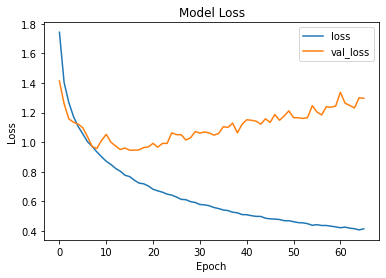

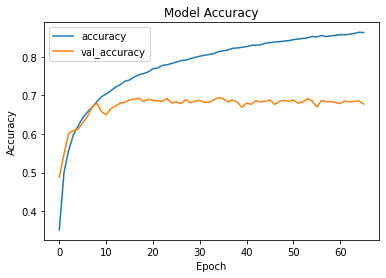

In [12]:
plot_model(model_history)

# 10 to 15 epochs seem to be the sweet spot in validation

Observations:
- Definite improvement in validation accuracy
- Now hitting close to 70% accuracy and improvement of over 200 basis points
- However this was an example CNN model for CIFAR - 10
- Consider using keras tuner with CNN to further improve on hyper parameters

<a id=section6></a>
## 6. Hyperparameter Tuning using Keras Tuner

In [9]:
#!pip install keras-tuner

INPUT_SHAPE = (32,32,3)
NUM_CLASSES = 10

class CNNHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes
    
    def build(self, hp):
        model = keras.Sequential()
        model.add(Conv2D(filters = 16, kernel_size = 3, activation = 'relu', input_shape = self.input_shape))
        model.add(Conv2D(filters = 16, kernel_size = 3, activation = 'relu'))
        model.add(MaxPooling2D(pool_size = 2))
        model.add(Dropout(rate = hp.Float('dropout_1', min_value = 0.0, max_value = 0.5, default = 0.25, step = 0.05,)))
        model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
        model.add(Conv2D(filters = hp.Choice('num_filters', values = [32,64], default = 64,), activation = 'relu', kernel_size = 3))
        model.add(MaxPooling2D(pool_size = 2))
        model.add(Dropout(rate = hp.Float('dropout_2', min_value = 0.0, max_value = 0.5, default = 0.25, step = 0.05,)))
        model.add(Flatten())
        model.add(Dense(units = hp.Int('units', min_value = 32, max_value = 512, step = 32, default = 128), 
                        activation = hp.Choice('dense_activation', values = ['relu', 'tanh', 'sigmoid'], default = 'relu')))
        model.add(Dropout(rate = hp.Float('dropout_3', min_value = 0.0, max_value = 0.5, default = 0.25, step = 0.05)))
        model.add(Dense(self.num_classes, activation = 'softmax'))
        model.compile(optimizer = keras.optimizers.Adam(hp.Float('learning_rate', min_value = 1e-4, max_value = 1e-2, sampling = 'LOG', default = 1e-3)),
                     loss = 'categorical_crossentropy', metrics = ['accuracy'])
        return model

hypermodel = CNNHyperModel(input_shape = INPUT_SHAPE, num_classes = NUM_CLASSES)

#parameters for search

INPUT_SHAPE = (32,32,3)
NUM_CLASSES = 10
SEED = 1
HYPERBAND_MAX_EPOCHS = 40
MAX_TRIALS = 20
EXECUTION_PER_TRIAL = 2

<a id=section601></a>
### 6.1 Hyperband

In [12]:
tuner = Hyperband(hypermodel, 
                  max_epochs = HYPERBAND_MAX_EPOCHS, 
                  objective = 'val_accuracy', 
                  seed = SEED, 
                  executions_per_trial = EXECUTION_PER_TRIAL, 
                  directory = 'hyperband', 
                  project_name = 'cifar10')

INFO:tensorflow:Reloading Oracle from existing project hyperband\cifar10\oracle.json
INFO:tensorflow:Reloading Tuner from hyperband\cifar10\tuner0.json


In [35]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
dropout_1 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
num_filters (Choice)
{'default': 64, 'conditions': [], 'values': [32, 64], 'ordered': True}
dropout_2 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
units (Int)
{'default': 128, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
dropout_3 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
learning_rate (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [36]:
N_EPOCH_SEARCH = 40
tuner.search(x_train_cnn, train_labels, epochs = N_EPOCH_SEARCH, validation_split = 0.1)

Trial 90 Complete [00h 06m 25s]
val_accuracy: 0.7529999911785126

Best val_accuracy So Far: 0.7791000008583069
Total elapsed time: 02h 01m 31s
INFO:tensorflow:Oracle triggered exit


In [37]:
tuner.results_summary()

Results summary
Results in hyperband\cifar10
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
dropout_1: 0.15000000000000002
num_filters: 64
dropout_2: 0.4
units: 160
dense_activation: relu
dropout_3: 0.0
learning_rate: 0.0006950772468507907
tuner/epochs: 40
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.7791000008583069
Trial summary
Hyperparameters:
dropout_1: 0.35000000000000003
num_filters: 64
dropout_2: 0.15000000000000002
units: 288
dense_activation: tanh
dropout_3: 0.1
learning_rate: 0.00021248812604678072
tuner/epochs: 40
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.7750000059604645
Trial summary
Hyperparameters:
dropout_1: 0.2
num_filters: 64
dropout_2: 0.25
units: 384
dense_activation: tanh
dropout_3: 0.1
learning_rate: 0.0005161743428272905
tuner/epochs: 40
tuner/initial_epoch: 14
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 9acae82a93857158493fc1700b3b1d0b
Score: 0.7745999991893768
T

In [40]:
best_model = tuner.get_best_models(num_models=1)[0]

loss, accuracy = best_model.evaluate(x_test_cnn,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.7400 - accuracy: 0.7622


In [41]:
best_model.save('optimized_model')

INFO:tensorflow:Assets written to: optimized_model\assets


Observations:
- Improvement on the basic CNN model by searching for hyperparameters.
- Though expensive from a computational standpoint - took over 2 hours to compute, it provided accuracy levels over 76%

<a id=section602></a>
### 6.2 Random Search

In [13]:
tuner = RandomSearch(hypermodel, 
                     objective = 'val_accuracy', 
                     seed = SEED, 
                     max_trials = MAX_TRIALS, 
                     executions_per_trial = EXECUTION_PER_TRIAL, 
                     directory = 'random_search',
                     project_name = 'cifar10RS')

tuner.search_space_summary()

Search space summary
Default search space size: 7
dropout_1 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
num_filters (Choice)
{'default': 64, 'conditions': [], 'values': [32, 64], 'ordered': True}
dropout_2 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
units (Int)
{'default': 128, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
dropout_3 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
learning_rate (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [14]:
N_EPOCH_SEARCH = 40
tuner.search(x_train_cnn, train_labels, epochs = N_EPOCH_SEARCH, validation_split = 0.1)

Trial 20 Complete [00h 06m 14s]
val_accuracy: 0.6743000149726868

Best val_accuracy So Far: 0.79339998960495
Total elapsed time: 02h 06m 04s
INFO:tensorflow:Oracle triggered exit


In [15]:
tuner.results_summary()

Results summary
Results in random_search\cifar10RS
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
dropout_1: 0.2
num_filters: 64
dropout_2: 0.25
units: 384
dense_activation: tanh
dropout_3: 0.1
learning_rate: 0.0005161743428272905
Score: 0.79339998960495
Trial summary
Hyperparameters:
dropout_1: 0.0
num_filters: 32
dropout_2: 0.30000000000000004
units: 288
dense_activation: tanh
dropout_3: 0.2
learning_rate: 0.0009719978423652108
Score: 0.7608000040054321
Trial summary
Hyperparameters:
dropout_1: 0.1
num_filters: 64
dropout_2: 0.30000000000000004
units: 256
dense_activation: tanh
dropout_3: 0.15000000000000002
learning_rate: 0.00016355245798526342
Score: 0.7603999972343445
Trial summary
Hyperparameters:
dropout_1: 0.35000000000000003
num_filters: 32
dropout_2: 0.05
units: 160
dense_activation: tanh
dropout_3: 0.4
learning_rate: 0.0009172617171127613
Score: 0.7577999830245972
Trial summary
Hyperparameters:
dropout_1: 0.05
num_filter

In [16]:
best_model = tuner.get_best_models(num_models=1)[0]

loss, accuracy = best_model.evaluate(x_test_cnn,test_labels)

best_model.save('optimized_modelRS')

313/313 [==============================] - 1s 2ms/step - loss: 0.6848 - accuracy: 0.7808
INFO:tensorflow:Assets written to: optimized_modelRS\assets


Observations:
- Random Search method provided improvement on Hyperband search
- Accuracy  has now hit to over 78%
- Computationally remains expensive with higher computation time than hyperband.

<a id=section603></a>
### 6.3 Bayesian Optimization

In [17]:
# Bayesian Optimization



tuner = BayesianOptimization(hypermodel,
                             objective = 'val_accuracy',
                             seed = SEED,
                             max_trials = MAX_TRIALS, 
                             executions_per_trial = EXECUTION_PER_TRIAL, 
                             directory = 'BayesianOptimization',
                             project_name = 'cifar10BO')

tuner.search_space_summary()

Search space summary
Default search space size: 7
dropout_1 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
num_filters (Choice)
{'default': 64, 'conditions': [], 'values': [32, 64], 'ordered': True}
dropout_2 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
units (Int)
{'default': 128, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
dropout_3 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
learning_rate (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [18]:
N_EPOCH_SEARCH = 40
tuner.search(x_train_cnn, train_labels, epochs = N_EPOCH_SEARCH, validation_split = 0.1)

Trial 20 Complete [00h 06m 22s]
val_accuracy: 0.7404000163078308

Best val_accuracy So Far: 0.7714000046253204
Total elapsed time: 02h 06m 13s
INFO:tensorflow:Oracle triggered exit


In [19]:
tuner.results_summary()

Results summary
Results in BayesianOptimization\cifar10BO
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
dropout_1: 0.15000000000000002
num_filters: 64
dropout_2: 0.2
units: 224
dense_activation: tanh
dropout_3: 0.1
learning_rate: 0.000180916041657174
Score: 0.7714000046253204
Trial summary
Hyperparameters:
dropout_1: 0.1
num_filters: 64
dropout_2: 0.30000000000000004
units: 256
dense_activation: tanh
dropout_3: 0.15000000000000002
learning_rate: 0.00016355245798526342
Score: 0.7635000050067902
Trial summary
Hyperparameters:
dropout_1: 0.0
num_filters: 64
dropout_2: 0.5
units: 512
dense_activation: relu
dropout_3: 0.45
learning_rate: 0.0014300297000164705
Score: 0.761000007390976
Trial summary
Hyperparameters:
dropout_1: 0.0
num_filters: 64
dropout_2: 0.5
units: 512
dense_activation: relu
dropout_3: 0.2
learning_rate: 0.0001
Score: 0.7601000070571899
Trial summary
Hyperparameters:
dropout_1: 0.25
num_filters: 64
dropout_2: 0.45
uni

In [20]:
best_model = tuner.get_best_models(num_models=1)[0]

loss, accuracy = best_model.evaluate(x_test_cnn,test_labels)

best_model.save('optimized_modelBO')

313/313 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.7646
INFO:tensorflow:Assets written to: optimized_modelBO\assets


Observations:
- Bayesian Optimization produced slightly lower accuracy than Random Search
- Remained computationally expensive - with compute times in excess of 2 hours

<a id=section7></a>
## 7. In-Conclusion & Next Steps

<a id=section701></a>
### 7.1 Analysis of Various Models

|Model|Accuracy|Loss|Compute-Time|
|---|---|---|---|
| Simple ANN | ~50% | 1.5 & Rising | Marginal |
| Using CNN | ~70% | 1.0 & Rising | Marginal |
| Hyperband | 76.22% | .74 | 02:01:31|
| Random Search | 78.08% | .68 | 02:06:04 |
| Bayesian Optimization | 76.46% | .69 | 02:06:13|

Hence quite apparently the winner is Random Search and I was able to achieve a 78% accuracy on the test data for this project.


<a id=section702></a>
### 7.2 Visualizing Predictions on Test Set

In [42]:
ls optimized_model

 Volume in drive C is OS
 Volume Serial Number is A2B7-EBDA

 Directory of C:\Users\ariji\Documents\Python\INSAID Data Science\Artificial Intelligence\Deep Learning Foundation\Project\Deep Learning Foundation Projects\CIFAR-10\optimized_model

17-06-2021  12:44    <DIR>          .
17-06-2021  12:44    <DIR>          ..
17-06-2021  12:44    <DIR>          assets
17-06-2021  12:44            22,342 keras_metadata.pb
17-06-2021  12:44           214,023 saved_model.pb
17-06-2021  12:44    <DIR>          variables
               2 File(s)        236,365 bytes
               4 Dir(s)  362,414,743,552 bytes free


Pic no -> 230062
(32, 32, 3)
This image is predicted by the system is a truck


'C:\\Users\\ariji\\Documents\\Python\\INSAID Data Science\\Artificial Intelligence\\Deep Learning Foundation\\Project\\Deep Learning Foundation Projects\\CIFAR-10'

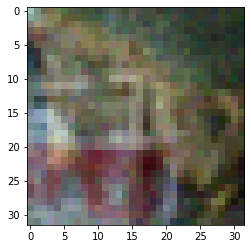

In [50]:
model3 = tf.keras.models.load_model('optimized_model')

nums = [0,1,2,3,4,5,6,7,8,9]
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
p = dict(zip(nums, classes))

directory = os.getcwd()
test_data = directory + '\\test'
os.chdir(test_data)
#place code here
i=random.randint(0,300000)
print('Pic no ->', i)
image = Image.open(str(i)+'.png')
plt.imshow(image)
image_arr = img_to_array(image)
print(image_arr.shape)
input_image = image_arr.reshape(1,32,32,3)
pred = np.argmax(model3.predict(input_image), axis = -1)[0]
print('This image is predicted by the system is a {}'. format(p[pred]))

os.chdir(directory)
os.getcwd()

<a id=section703></a>
### 7.3 Concluding Points & Way Forward

<br>
Overall the common concensus is that the CIFAR 10 dataset is a widely understood dataset. Unfortunately for me accuracy on CIFAR - 10 dataset has achieved 99.7% accuracy on the test data using, sharpness-awareness minimization techniques.  However, this is an opportunity to learn other modeling techniques LaNET which has led to significant improvemnets in accuracy over traditional CNN techqniues since the 1970s.
<br>
<center><img src="https://github.com/ArijitChakrabarti/Cifar-10-Deep-Learning-FoundationKeras-Tuner-Arijit/blob/main/cifar%2010%20accuracy.JPG?raw=true" /></center>
<br>
However it gives me great pride to have been able to use optimization techiques launched by Keras i.e. Keras-Tuner as late as 2019 and be able to improve the model accuracy in a few simple steps. With an 80% accuracy - there are still mistakes that the model makes as far as classification is concerned, but it improves vastly over the initial Simple ANN model - which provided only near random accuracy.
<br>
<br>
I have managed to install CUDA in my local system and all the results are based off effectively one of the fastes graphics cards on the planet -  the RTX 3080. With over 10 GB of RAM and over 272 tensor cores - I could achieve significant reduction in compute times. Traditionally on an RTX 2080 the same calculations (on the previous generation graphics card) would have taken over 10 hours each.  Hence implying the generational improvement in hardware will effectively allow for improved capabilities with data and not just from a software / algorithmic point of view.
<br>
<br>
Not only that the world has already moved towards the CIFAR 100 data set and look forward to working on the same as my understanding on image recognition / classfication improves.